단순회귀분석은 두변수간의 관계를 직선 형태로 설명하는 알고리즘이다. 독립변수 x 와 종속변수 y사이에 선형의 상관관계가 있지만, 직선보다는 곡선으로 설명하는 것이 적합할때는 단순회귀 분석은 부적합하다.  
이럴 때 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../file/ml_pandas/part7/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','accceleration','model_year','origin','name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,accceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# replace ?
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
df.describe()

,mpg,cylinders,displacement,horsepower,weight,accceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#  속성선택  
x = 'cylinders', 'horsepower', 'weight'  
y = 'mpg'

In [5]:
ndf = df[['mpg', 'cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


# 훈련/검증 데이터 분할

In [8]:
'''
앞의 산점도에서 보면 mpg 와 weight, horsepower가 선형관계를 보이는 것이 보인다.
회귀 방정식 찾기 - 훈련데이터와 검증데이터로(7:3) 나눠서 모형 구축
 '''

X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#x = 독립변수, y=종속변수, test_size=검증테스트 사이즈, random_stage=랜덤추출값)

print(f'train data  갯수: {X_train.shape}')
print(f'test data 갯수: {X_test.shape}')

train data  갯수: (274, 1)
test data 갯수: (118, 1)


모형 학습 및 검증  
다항식 변환을 위한 함수 PolynomialFeatures() 
PolynomialFeatures(degree=2) 2차항 객체인 ploy를 생성  
독립변수로 사용할 X_train데이터를 fit_tranafrom()메소드에 전달하면 2차항 회귀분석으로 변환  
X_train의 1개 열이 X_train_ploy에서는 3개의 열로 늘어난다. 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#다항식 변환
poly = PolynomialFeatures(degree=2)
X_train_ploy = poly.fit_transform(X_train)

print(f'원 데이터 :{X_train.shape}')
print(f'2차항 변환 데이터: {X_train_ploy.shape}')

원 데이터 :(274, 1)
2차항 변환 데이터: (274, 3)


In [15]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.708700926297548


훈련데이터(training data)의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교한다.  
2차항으로 변환된 검증데이터 (x_test_ploy)를 predict()메소드에 입력하여 예측한 결과인 y_hat_test로 표시하면 회귀선이 된다.  
모형이 결정계수가 높아진것에서 알수 있듯 이 직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 말할 수 있다.  

In [68]:
# 회귀식의 기울기
print(f'기울기 a: {lr.coef_}')
print(f'\n')

# 회귀식의 y절편
print(f'y절편 b: {lr.intercept_}')

기울기 a: [[-0.00775343]]


y절편 b: [46.71036626]


InvalidIndexError: (slice(None, None, None), None)

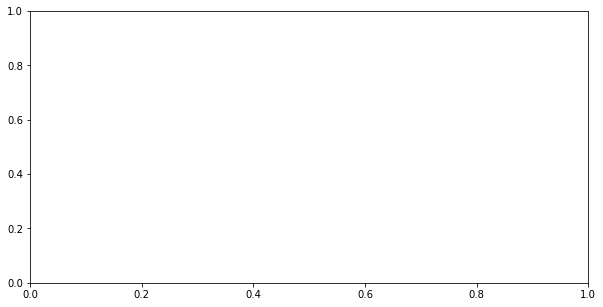

In [12]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [13]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

NameError: name 'poly' is not defined

AttributeError: 'DataFrame' object has no attribute 'y_train'

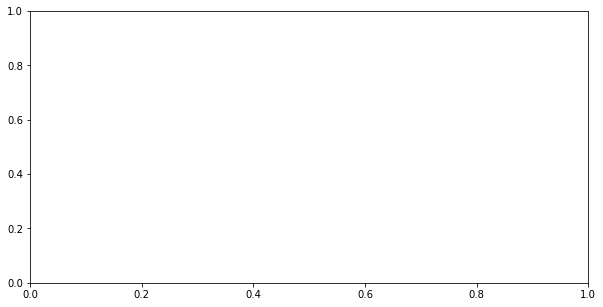

In [11]:
''' 
모형이 예측한 결과와 실제 값을 비교해 본다. 독립변수 전체데이타(X)를 predict() 메소드에
입력하여 모형이 반환하는 예측값을 y_hat에 저장한다.
실제 값 y와 모형의 예측값 y_hat을 
'''
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train. y_train, 'o', label='Train Data')
ax.plot(X_test. y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.legend()
plt.show()
plt.close()


실제값은 왼쪽으로 편향되어있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 따라서 독립변수(weight) 와 종속 변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다.   
앞서 그린 산점도를 보면 직선보다는 곡선의 형태가 더 적합해 보인다. 이럴경우 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다.   